In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

Using TensorFlow backend.


In [3]:
data = pd.read_csv('eth.csv')
data.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,13-Nov-18,210.15,210.52,206.14,206.83,"1,610,260,000","21,341,261,802"
1,14-Nov-18,206.53,207.05,174.08,181.40,"2,595,330,000","18,721,032,761"
2,15-Nov-18,181.90,184.25,170.19,180.81,"2,638,410,000","18,663,659,629"
3,16-Nov-18,180.87,181.35,173.13,175.18,"2,015,330,000","18,086,156,169"
4,17-Nov-18,175.36,175.85,172.87,174.00,"1,832,800,000","17,968,221,715"


In [4]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [5]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [6]:
def normalize_windows(data):
    normalized_data = []
    for window in data:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)
    return np.array(normalized_data)

result = normalize_windows(result)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((283, 50, 1), (31, 50, 1))

In [7]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Train on 283 samples, validate on 31 samples
Epoch 1/20
283/283 [==============================] - 2s 5ms/step - loss: 0.0213 - val_loss: 0.0013
Epoch 2/20
283/283 [==============================] - 1s 4ms/step - loss: 0.0126 - val_loss: 0.0015
Epoch 3/20
283/283 [==============================] - 1s 3ms/step - loss: 0.0100 - val_loss: 0.0025
Epoch 4/20
283/283 [==============================] - 1s 3ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 5/20
283/283 [==============================] - 1s 3ms/step - loss: 0.0073 - val_loss: 0.0019
Epoch 6/20
283/283 [==============================] - 1s 3ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 7/20
283/283 [==============================] - 1s 3ms/step - loss: 0.0056 - val_loss: 0.0084
Epoch 8/20
283/283 [==============================] - 1s 4ms/step - loss: 0.0060 - val_loss: 0.0016
Epoch 9/20
283/283 [==============================] - 1s 3ms/step - loss: 0.0051 - val_loss: 0.0023
Epoch 10/20
283/283 [==============================] - 

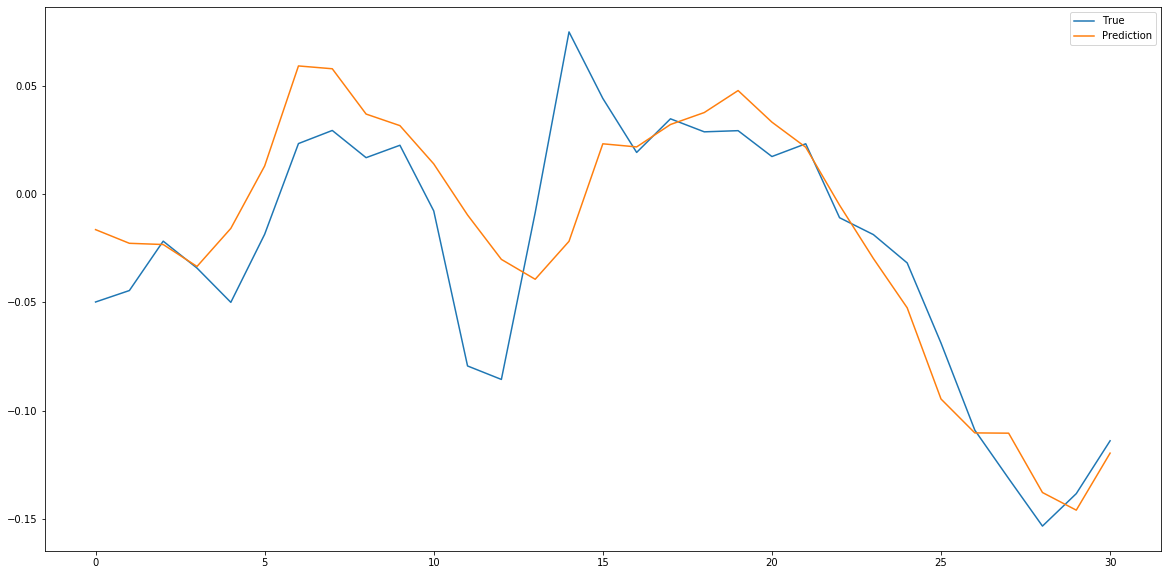

In [11]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()